# <center> Parse ping results // local and global </center>
## <center> Scan ping results and get the times </center>
### <center> Parse and display plot</center>

## Example of usage (on a linux shell):  
```
ping -i 0.3 -c 3600 104.102.209.173 | tee 2021-10-16-1400.log  
```

![Ping Example](ping-example.png)

```
 -i  : ping interval  
 -c  : ping count (how many packets to send)  
 tee : send the output to the display and the file
```


In [6]:
import pandas            as pd
import numpy             as np

import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', **{'size' : 16})


#### Load the results into a strings list:

In [7]:
def get_ping_times_from_log_file(sFileName):
    lLines       = [line.strip() for line in open(sFileName) if line.startswith("64 bytes from")]
    dResult      = pd.DataFrame([float(line.split("time=")[1].replace(" ms","")) for line in lLines], columns=['ping_ms'])

    return dResult

In [8]:
sFileNameUSA    = r'usa_ping.log'
sFileNameLocal  = r'local_ping.log'

dPingTimesUSA   = get_ping_times_from_log_file(sFileNameUSA)
dPingTimesLocal = get_ping_times_from_log_file(sFileNameLocal)

In [9]:
dPingTimesLocal

,ping_ms
0,151.0
1,151.0
2,151.0
3,151.0
4,152.0
...,...
3590,152.0
3591,152.0
3592,151.0
3593,161.0


#### Display 2 plots with the times data converted to float:

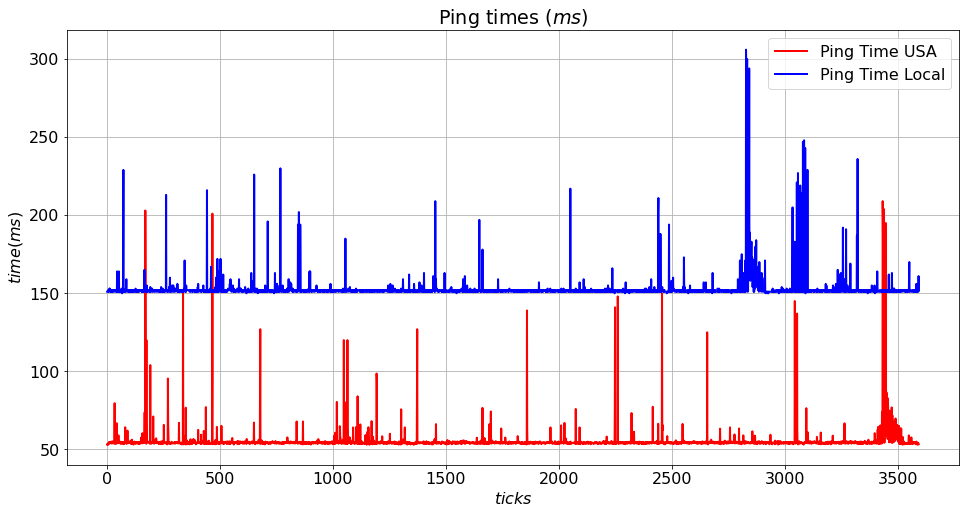

In [10]:
plt.figure(figsize=(16,8))
plt.plot   (dPingTimesUSA,   c='r', lw=2, label='Ping Time USA'  )
plt.plot   (dPingTimesLocal, c='b', lw=2, label='Ping Time Local')

plt.title  ('Ping times ($ms$)')
plt.xlabel ('$ticks$')
plt.ylabel ('$time(ms)$')
plt.grid   ()
plt.legend ()
plt.show   ()